<a href="https://colab.research.google.com/github/john-caballero/Data-Discovery/blob/main/modulo3_manipulacion_datos_faltantes/identificacion_de_missings_visto_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >


# **Identificación y Cuantificación de Missings**

---

**Objetivos**

- Detectar y cuantificar valores faltantes en un conjunto de datos.

- Visualizar patrones de omisión de datos.

- Interpretar los resultados para tomar decisiones informadas sobre el tratamiento de los valores faltantes.

**Dataset Utilizado**

Utilizaremos el dataset "Loan Prediction Problem Dataset" de Analytics Vidhya, que contiene información sobre solicitudes de préstamos y presenta valores faltantes reales.
Analytics Vidhya

Descargar el dataset desde: Loan Prediction Dataset



Asegúrate de tener instaladas las siguientes librerías:

In [1]:
%%capture
!pip install pandas numpy matplotlib seaborn missingno

### 1. Importar Librerías y Cargar el Dataset


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Cargar el dataset
df = pd.read_csv("train.csv")  # Asegúrate de que el archivo esté en tu directorio de trabajo


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Exploración Inicial

In [4]:
# Dimensiones del dataset
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Tipos de datos y conteo de valores no nulos
df.info()

El dataset contiene 614 filas y 13 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Fill rate**: Es el porcentaje de datos poblados en una variable

**Missing rate**: Es el porcentaje de missings en una variable

In [24]:
df_resume = df.describe().transpose().reset_index()
df_resume

,index,count,mean,std,min,25%,50%,75%,max
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
2,LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
3,Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
4,Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [25]:

df_resume.columns = ['feature', 'N', 'mean', 'std', 'min', 'P25', 'P50', 'P75', 'max']
df_resume

,feature,N,mean,std,min,P25,P50,P75,max
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
2,LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
3,Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
4,Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [26]:
len(df)

614

In [27]:
df_resume['Fill_rate'] = df_resume.N/len(df)
df_resume['Missing_rate'] = 1 - df_resume.Fill_rate

In [28]:
df_resume.head(10)

,feature,N,mean,std,min,P25,P50,P75,max,Fill_rate,Missing_rate
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0,1.000000,0.000000
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0,1.000000,0.000000
2,LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0,0.964169,0.035831
3,Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0,0.977199,0.022801
4,Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0,0.918567,0.081433


### 3. Cuantificación de Valores Faltantes

In [31]:
df.isnull().mean()

,0
Loan_ID,0.000000
Gender,0.021173
Married,0.004886
Dependents,0.024430
Education,0.000000
Self_Employed,0.052117
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.035831
Loan_Amount_Term,0.022801


<ipython-input-34-a45ceb60ff37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="viridis")


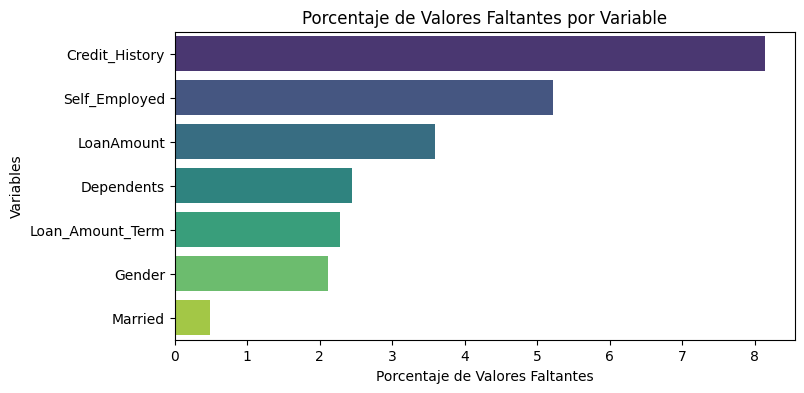

In [34]:
# Porcentaje de valores faltantes por variable
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]

# Visualización de los valores faltantes
plt.figure(figsize=(8,4))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="viridis")
plt.title("Porcentaje de Valores Faltantes por Variable")
plt.xlabel("Porcentaje de Valores Faltantes")
plt.ylabel("Variables")
plt.show()


### 4. Visualización de Patrones de Valores Faltantes

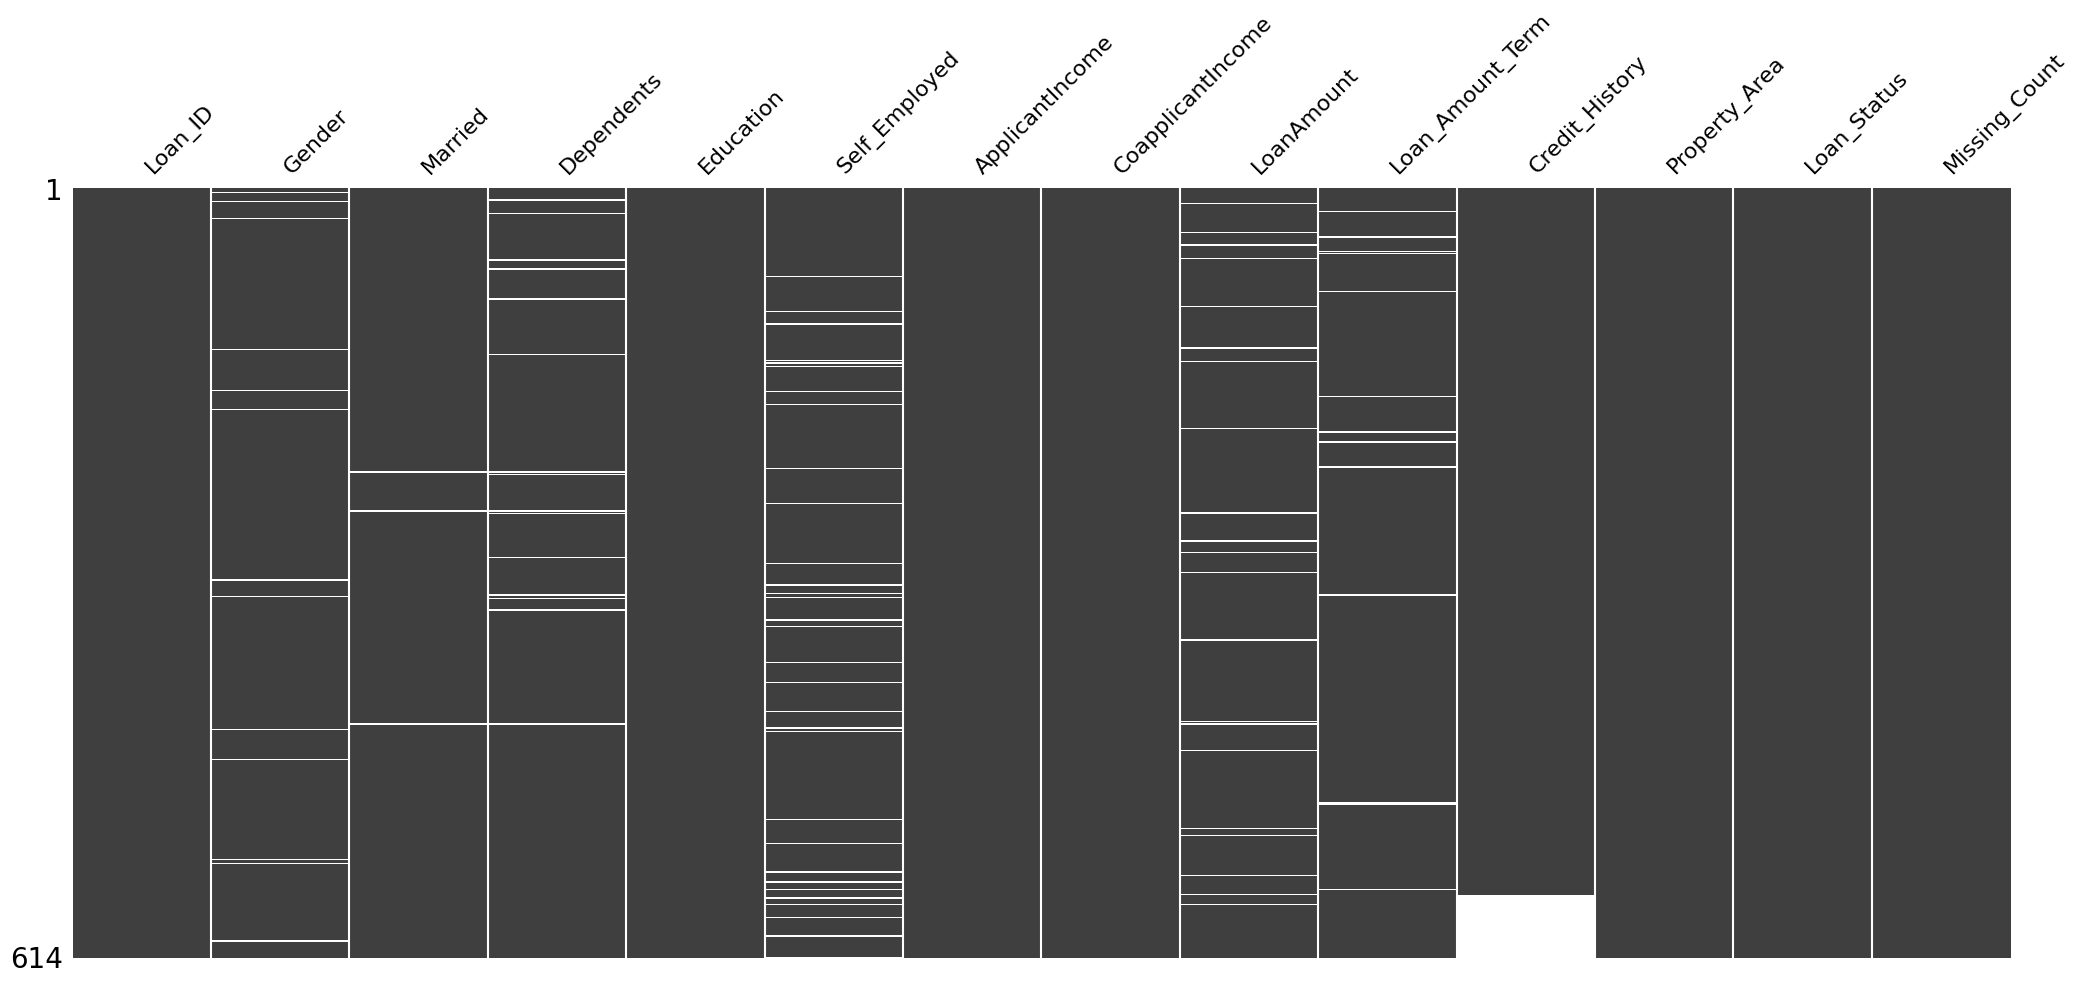

In [41]:
# Matriz de valores faltantes
msno.matrix(df.sort_values('Credit_History', ascending=True),
                           sparkline=False)
plt.show()


In [37]:
msno.matrix?

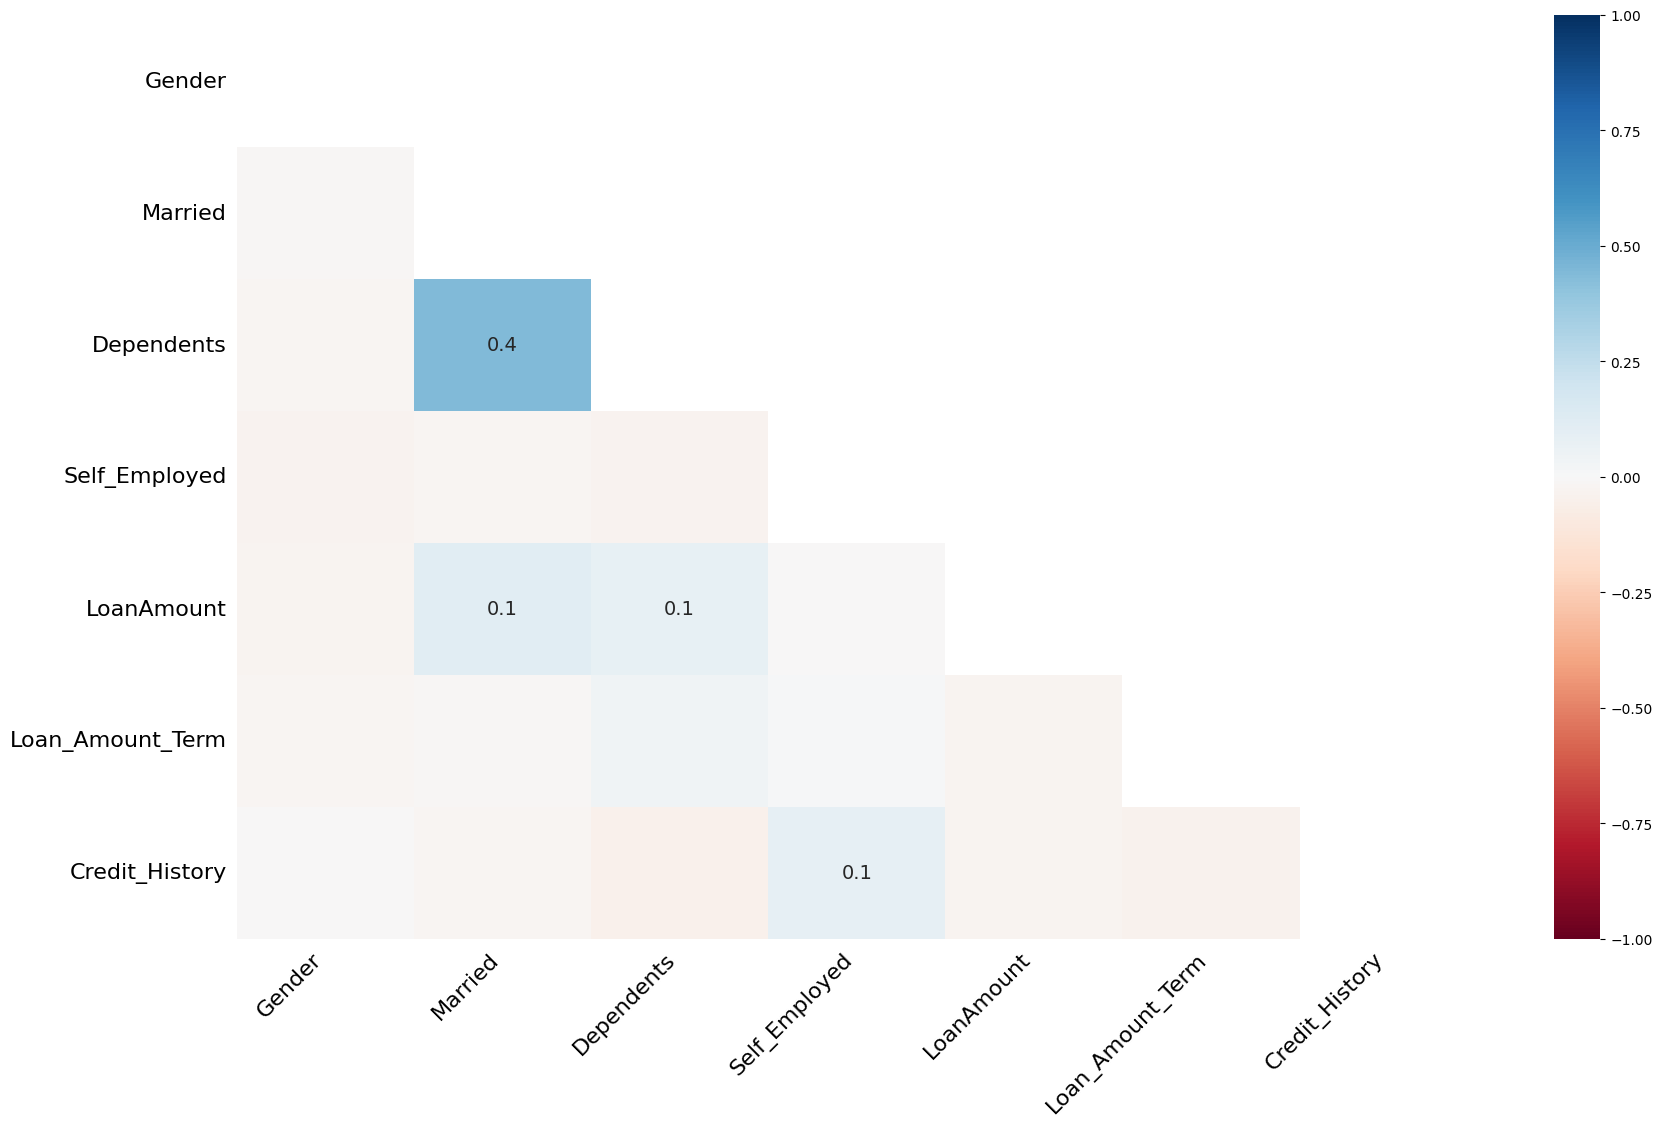

In [42]:
# Mapa de calor de correlaciones de omisión
msno.heatmap(df)
plt.show()

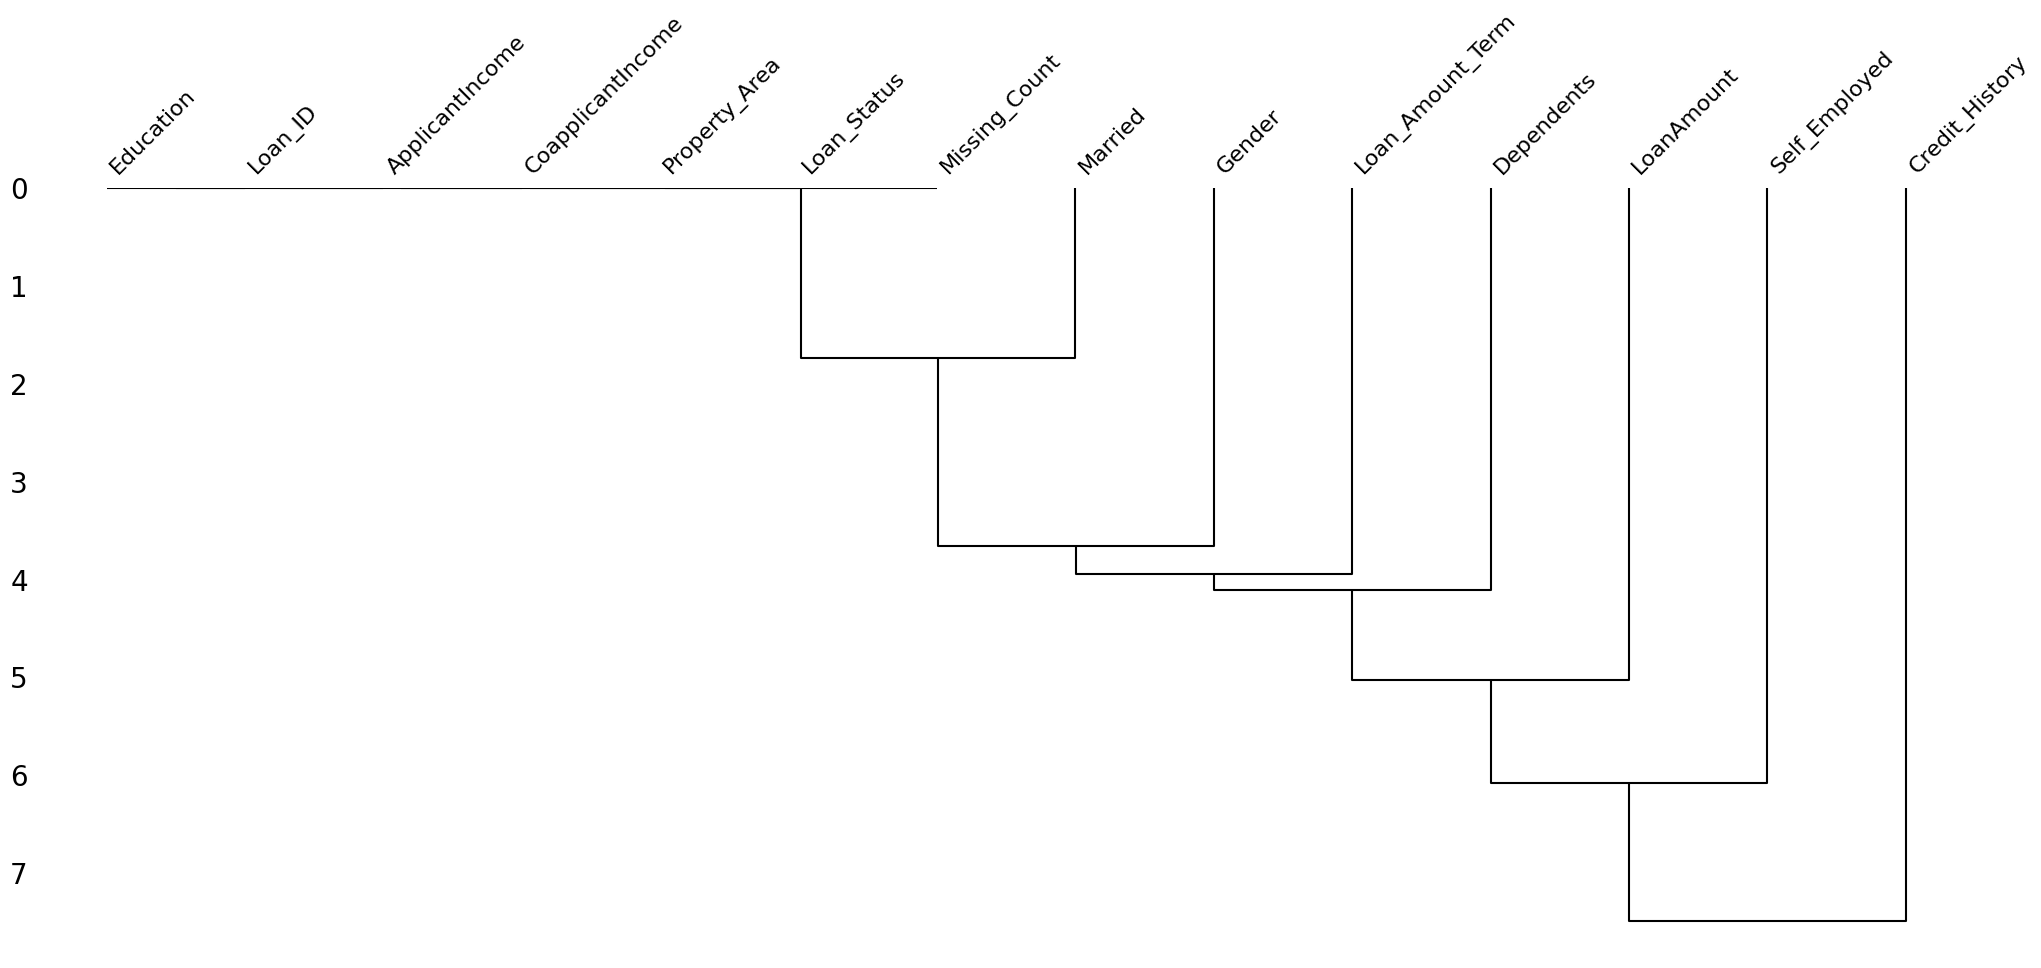

In [43]:
# Dendrograma para agrupar variables con patrones similares de omisión
msno.dendrogram(df)
plt.show()


### 5. Análisis de Filas con Múltiples Valores Faltantes

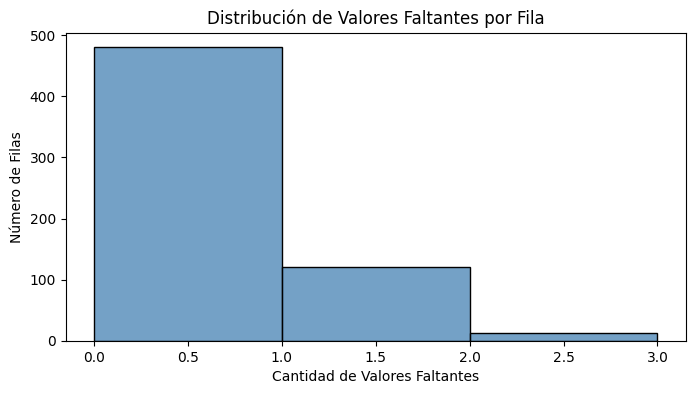

In [33]:
# Conteo de valores faltantes por fila
df['Missing_Count'] = df.isnull().sum(axis=1)

# Visualización de la distribución de valores faltantes por fila
plt.figure(figsize=(8, 4))
sns.histplot(df['Missing_Count'], bins=range(0, df['Missing_Count'].max()+1), kde=False, color='steelblue')
plt.title("Distribución de Valores Faltantes por Fila")
plt.xlabel("Cantidad de Valores Faltantes")
plt.ylabel("Número de Filas")
plt.show()


### Reflexión y Discusión

- ¿Qué variables presentan el mayor porcentaje de valores faltantes?

- ¿Existen patrones en los valores faltantes que sugieran una relación entre variables?

- ¿Es apropiado eliminar filas o columnas con muchos valores faltantes, o es preferible imputarlos?

- ¿Qué técnicas de imputación serían más adecuadas para este dataset?

### Conclusión

Este laboratorio proporciona una guía práctica para la identificación y cuantificación de valores faltantes en un dataset real. Al aplicar estas técnicas, podrás tomar decisiones informadas sobre cómo manejar los valores faltantes y preparar tus datos para análisis posteriores o modelado predictivo.

---

# Gracias por completar este laboratorio!

---
